# Group 13 ML Project - Stable Diffusion images to prompts

## Loading the dataset from Huggingface

In [ ]:
# Install the datasets module required to load datasets from Huggingface
%pip install datasets

In [1]:
# Import required modules
import numpy as np
from PIL import Image
from datasets import load_dataset

In [2]:
# Load dataset, selecting the '2m_first_10k' subset to load only the first 1.000 examples (~12 GB)
dataset = load_dataset('poloclub/diffusiondb', '2m_first_10k')

# Other options:
# 2m_first_5k, 2m_first_10k
# 2m_random_1k, 2m_random_5k, 2m_random_10k

Found cached dataset diffusiondb (C:/Users/ademk/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_10k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# all data is in the 'train' split, this output shows all columns in the dataset
my_10k_data = dataset['train']
my_10k_data

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 10000
})

## Let's check the first prompt + image

a renaissance portrait of dwayne johnson, art in the style of rembrandt!! intricate. ultra detailed, oil on canvas, wet - on - wet technique, pay attention to facial details, highly realistic, cinematic lightning, intricate textures, illusionistic detail, 


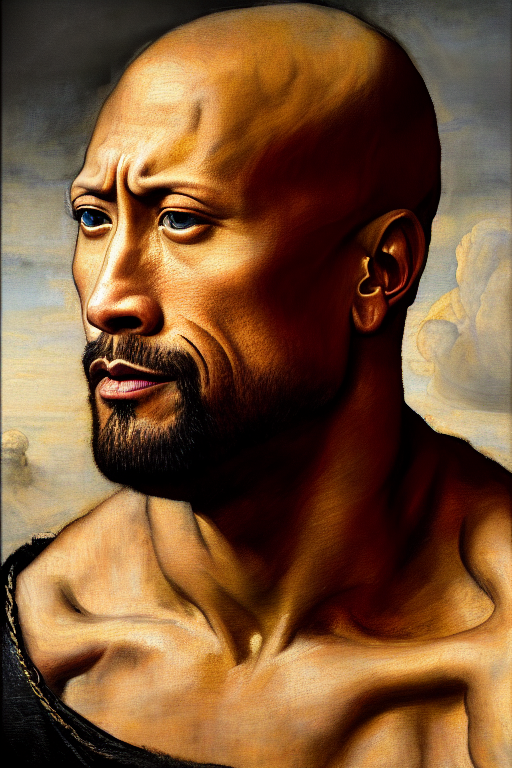

In [4]:
# Check first prompt and display corresponding image
print(my_10k_data['prompt'][0])
display(my_10k_data['image'][0])

# Export as pickled pandas dataframe

First, let's create a pandas DataFrame of the images and prompts:

In [5]:
import pandas as pd

images_df = pd.DataFrame(columns=['image', 'prompt'])

In [6]:
# Resize every image and add to dataframe as an array
desired_size = (128, 128)

for row in my_10k_data:
    image = row['image']
    image = image.resize(desired_size)
    prompt = row['prompt']
    new_row = pd.DataFrame([{'image': image, 'prompt': prompt}])
    images_df = pd.concat([images_df, new_row], ignore_index=True)

In [7]:
images_df.head()

,image,prompt
0,<PIL.Image.Image image mode=RGB size=128x128 a...,"a renaissance portrait of dwayne johnson, art ..."
1,<PIL.Image.Image image mode=RGB size=128x128 a...,"portrait of a dancing eagle woman, beautiful b..."
2,<PIL.Image.Image image mode=RGB size=128x128 a...,"epic 3 d, become legend shiji! gpu mecha contr..."
3,<PIL.Image.Image image mode=RGB size=128x128 a...,an airbrush painting of cyber war machine scen...
4,<PIL.Image.Image image mode=RGB size=128x128 a...,concept art of a silent hill monster. painted ...


In [8]:
images_df.to_pickle("images.pkl")